In [1]:
import cv2
import matplotlib.pyplot as plt
from immas import MammogramImage , preprocessing , segmentation
from immas.io import read_dataset
from immas.basic_functions import show_image_plt

from immas import preprocessing
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)


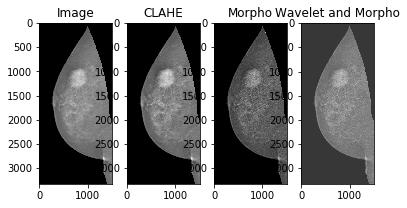

In [2]:
img = mm.image_data
enhanced = preprocessing.clahe(img)
morpho = preprocessing.morphoEnhancement(img)
img_wavelet = preprocessing.waveletTransform(morpho)

plt.figure(figsize=(20, 10))
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(img, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image')

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(enhanced, interpolation="nearest", cmap=plt.cm.gray)
plt.title('CLAHE')

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(morpho, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Morpho')

plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(img_wavelet, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Wavelet and Morpho')
plt.show()

In [9]:
def Segmentation(img):
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img1 = preprocessing.open(img,(10,10))
    img2 = preprocessing.open(img,(20,20))
    return (img1,img2)

def Segmentation2(img):
    img = segmentation.mean_shift(img,20,30)
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img = preprocessing.open(img,(10,20))
    return img

from immas import preprocessing

def testPreProcessing (img):
    #img = preprocessing.resize(img, 0.5, 0.5)
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    #img = preprocessing.clahe(img,10)
    img = preprocessing.morphoEnhancement(img,2,10.0)
    img = preprocessing.waveletTransform(img)
    return img


Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 24, number of images for testing is 0


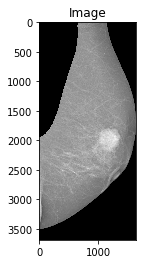

C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


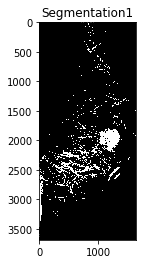

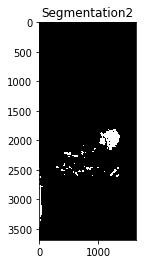

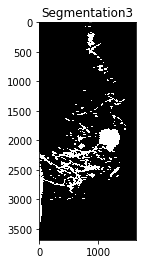

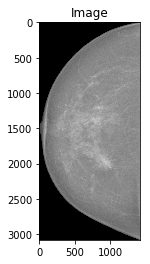

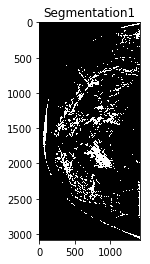

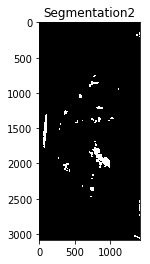

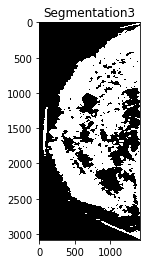

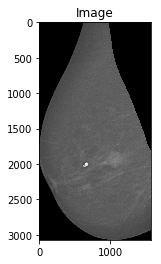

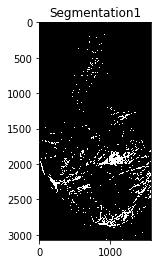

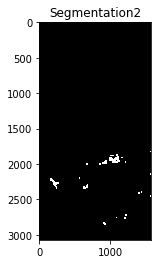

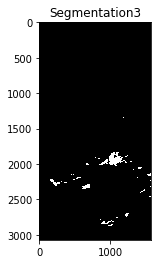

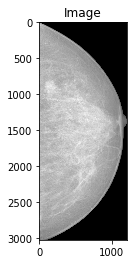

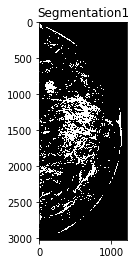

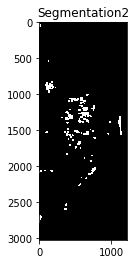

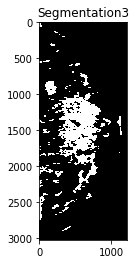

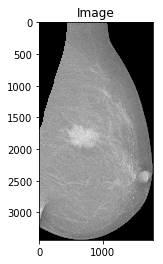

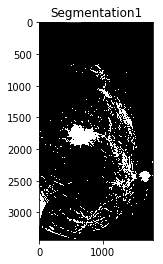

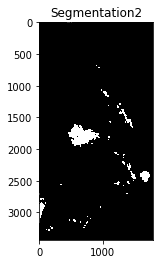

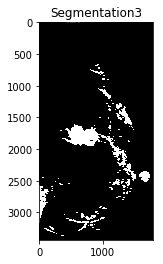

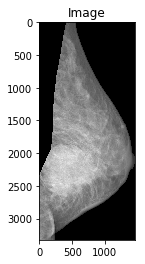

In [ ]:
data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks", train_set_fraction=1)

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

img = data_set["train"]



for m in img:
    m.read_data()
    m.image_data = testPreProcessing(m.image_data)
       
    #segment using both methods
    result1, result2 = Segmentation(m.image_data)
    result3 = Segmentation2(m.image_data)

    #show both results
    plt.figure(figsize=(20, 40))
    plt.subplot(1,4,1)
    plt.axis("off")
    plt.imshow(m.image_data, interpolation="nearest", cmap=plt.cm.gray)
    plt.title('Preprocessed image')
    
    plt.subplot(1,4,2)
    plt.axis("off")
    plt.imshow(result1, interpolation="nearest", cmap=plt.cm.gray)
    plt.title('Segmentation1')
    
    plt.subplot(1,4,3)
    plt.axis("off")
    plt.imshow(result2, interpolation="nearest", cmap=plt.cm.gray)
    plt.title('Segmentation2')
    
    plt.subplot(1,4,4)
    plt.axis("off")
    plt.imshow(result3, interpolation="nearest", cmap=plt.cm.gray)
    plt.title('Segmentation3')
    plt.show()

Jaccard Index to Verify Results

In [ ]:

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

av_jaccard = 0
av_jaccard2 = 0
img = data_set["train"]
count = 0
for m in img:
    m.read_data()
   
    m.image_data = testPreProcessing(m.image_data)
    SegA = Segmentation(m.image_data)

    SegB = Segmentation2(m.image_data)
    
    if (SegA.shape == (m.cropped_ground_truth).shape):
        count += 1
        av_jaccard = av_jaccard + segmentation.jaccard_index(SegA,  m.cropped_ground_truth)
        print(av_jaccard)
        av_jaccard2 = av_jaccard2 + segmentation.jaccard_index(SegB,  m.cropped_ground_truth)
        print(av_jaccard2)
        
print("Average jaccard index for training set (Segmentaion1)is {}".format(av_jaccard/count))
print("Average jaccard index for training set (Segmentaion2)is {}".format(av_jaccard2/count))